## Пример решения задачи регрессии

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [2]:
# получим столбец чисел, равномерно распределенных на интервале [0, 1) и упорядоченных по возрастанию
X = np.sort( 5 * np.random.rand(40, 1), axis = 0 )

In [3]:
X[:5]

array([[0.3863673 ],
       [0.47759268],
       [0.61852349],
       [0.75539018],
       [0.81155762]])

In [4]:
# зададим какую-нибудь функцию
# функция ravel() применена, чтобы преобразовать вложенный лист np.sin( X ) в простой массив
y = np.sin( X ).ravel()
y

array([ 0.376826  ,  0.45964256,  0.57983283,  0.68557278,  0.72536027,
        0.87200171,  0.87806468,  0.90753966,  0.94580671,  0.9799006 ,
        0.99670872,  0.99964952,  0.99951645,  0.96038972,  0.939054  ,
        0.78886428,  0.67776718,  0.67562364,  0.60296113,  0.59217939,
        0.57520104,  0.31493527,  0.27463216,  0.21283042, -0.01673637,
       -0.068105  , -0.09503435, -0.45191856, -0.46700323, -0.5635834 ,
       -0.60606774, -0.75010519, -0.76018732, -0.80531558, -0.82150007,
       -0.83893324, -0.9515901 , -0.9539117 , -0.99854233, -0.9698899 ])

In [5]:
np.sin( X )[:5]

array([[0.376826  ],
       [0.45964256],
       [0.57983283],
       [0.68557278],
       [0.72536027]])

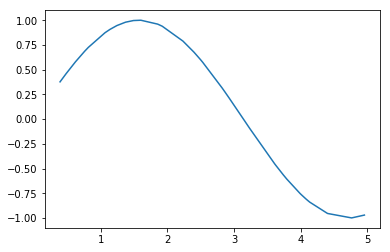

In [6]:
plt.plot( X, y )
plt.show()

In [7]:
# добавим шум к зависимой переменной
# к каждому пятому элементу добавляем случайное число
y[::5] += 1 * ( 0.5 - np.random.rand( 8 ) )

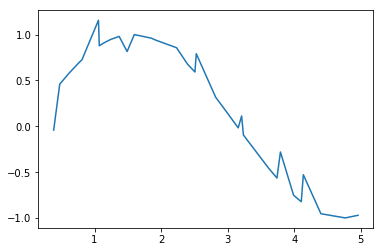

In [8]:
plt.plot( X, y )
plt.show()

In [9]:
# определим набор значений, на которых надо будет делать предсказания
T = np.linspace( 0, 5, 500 )[:, np.newaxis] # 500 точек в интервале от 0 до 5

In [10]:
T[:5]

array([[0.        ],
       [0.01002004],
       [0.02004008],
       [0.03006012],
       [0.04008016]])

In [11]:
# задаем количество соседей, которое будем учитывать в KNN
n_neighbors = 5

In [12]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'uniform' )
y_ = knn.fit( X, y ).predict( T )

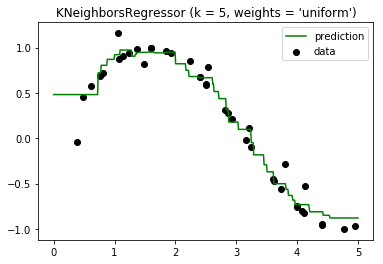

In [13]:
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))
plt.show()

Для варианта с весами видно сильное влияние расстояния

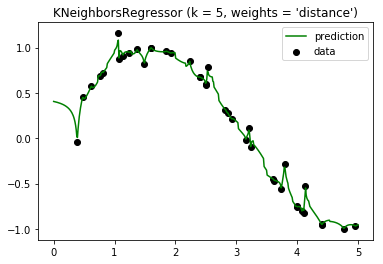

In [14]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'distance' )
y_ = knn.fit( X, y ).predict( T )

plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'distance'))
plt.show()